In [84]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pickle
import jax.numpy as jnp

import jaxley as jx
from nex.colors import cols as papercols

In [86]:
import time
import IPython.display as IPd
from svgutils.compose import *

# Synthetic data

In [4]:
with open("../results/01_synthetic/all_best_params.pkl", "rb") as handle:
    all_best_params = pickle.load(handle)
with open("../results/01_synthetic/best_traces.pkl", "rb") as handle:
    best_traces = pickle.load(handle)
with open("../results/01_synthetic/best_losses.pkl", "rb") as handle:
    best_losses = pickle.load(handle)
with open("../results/01_synthetic/total_sims.pkl", "rb") as handle:
    total_sims = pickle.load(handle)
with open("../results/01_synthetic/x_o.pkl", "rb") as handle:
    x_o = pickle.load(handle)
with open("../results/01_synthetic/time_vec.pkl", "rb") as handle:
    time_vec = pickle.load(handle)
with open("../results/01_synthetic/losses_of_every_starting_point.pkl", "rb") as handle:
    losses_of_every_starting_point = pickle.load(handle)
with open("../results/01_synthetic/genetic_algorithm_losses.pkl", "rb") as handle:
    ga_losses = pickle.load(handle)

nseg = 4
cell = jx.read_swc("../morphologies/bbp_with_axon.swc", nseg=nseg, max_branch_len=300.0, assign_groups=True)

### Panel A

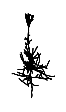

In [5]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.6, 1.2))
    ax = cell.vis(ax=ax, morph_plot_kwargs={"linewidth": 0.3})
    ax = cell.soma[0,0].vis(ax=ax, col=papercols["soma"], morph_plot_kwargs={"linewidth": 0.3, "s": 15, "zorder": 1000})
    ax = cell.apical.vis(ax=ax, col=papercols["apical"], morph_plot_kwargs={"linewidth": 0.3})
    ax = cell.axon.vis(ax=ax, col=papercols["axon"], morph_plot_kwargs={"linewidth": 0.3})
    ax = cell.basal.vis(ax=ax, col=papercols["basal"], morph_plot_kwargs={"linewidth": 0.3})
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig("../svg/panel_a1.svg", bbox_inches="tight", transparent=True)
    plt.show()

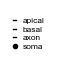

In [6]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.4, 0.3))
    _ = ax.plot([0], [0], c=papercols["apical"])
    _ = ax.plot([0], [0], c=papercols["basal"])
    _ = ax.plot([0], [0], c=papercols["axon"])
    _ = ax.scatter([0], [0], c=papercols["soma"])
    ax.set_xlim([2, 3])
    ax.set_ylim([2, 3])
    ax.legend(
        ["apical", "basal", "axon", "soma"],
        handlelength=0.3,
        labelspacing=0.2,
    )
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig("../svg/panel_a2.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel B1

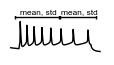

In [7]:
windows = [np.arange(200,2200), np.arange(2200,3800)]

with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.22, 0.51))
    _ = ax.plot([time_vec[windows[0][0]], time_vec[windows[0][-1]]-1.0], [58.0, 58.0], marker="|", color=papercols["data"])
    _ = ax.plot([time_vec[windows[1][0]]+1.0, time_vec[windows[1][-1]]], [58.0, 58.0], marker="|", color=papercols["data"])

    _ = ax.plot(time_vec, x_o.T, c="k", zorder=1000)

    _ = ax.text(11.0, 70.0, "mean, std")
    _ = ax.text(56.5, 70.0, "mean, std")
    _ = ax.set_xticks([])
    _ = ax.set_xticklabels([])
    _ = ax.set_xlim([0, 105])
    _ = ax.set_yticks([])
    _ = ax.set_ylim([-95,65])
    
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    plt.savefig("../svg/panel_b1.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel B2

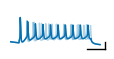

In [8]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.22, 0.51))
    _ = ax.plot(time_vec, np.asarray(best_traces)[1:4, 0, :].T, color=papercols["jaxley"], alpha=0.3)
    best_ind = np.argmin(np.asarray(best_losses))
    _ = ax.plot(time_vec, np.asarray(best_traces)[2, 0, :].T, color=papercols["jaxley"])
    _ = ax.set_xticks([])
    _ = ax.set_xlim([0, 105])
    _ = ax.set_yticks([])
    _ = ax.set_ylim([-95, 65])
    _ = ax.plot([105, 105], [-95, -65], c="k", clip_on=False)
    _ = ax.plot([85, 105], [-95, -95], c="k", clip_on=False)
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    plt.savefig("../svg/panel_b2.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel C1

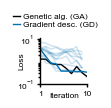

In [9]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.6, 0.6))
    _ = ax.plot(np.arange(1, 11), np.min(ga_losses, axis=0), c=papercols["genetic_alg"], alpha=1.0)
    _ = ax.plot(np.arange(1, 11), np.min(losses_of_every_starting_point, axis=0), c=papercols["jaxley"], alpha=1.0)
    for l in losses_of_every_starting_point:
        _ = ax.plot(np.asarray(l)[:10], c=papercols["jaxley"], alpha=0.2)
    _ = ax.set_xlabel("Iteration", labelpad=-3)
    _ = ax.set_ylabel("Loss", labelpad=-5)
    _ = ax.set_yscale("log")
    _ = ax.legend(
        ["Genetic alg. (GA)", "Gradient desc. (GD)"], 
        loc="upper right", 
        bbox_to_anchor=[1.4, 1.7, 0.0, 0.0], 
        ncol=1,
        handlelength=0.8,
        columnspacing=0.8,
        handletextpad=0.4,
        labelspacing=0.15
    )
    _ = ax.set_ylim([0.1, 12])
    _ = ax.set_yticks([0.1, 10.0])
    _ = ax.set_xticks([1, 10])
    _ = ax.set_xlim([1, 10])
    plt.savefig("../svg/panel_c1.svg", bbox_inches="tight")
    plt.show()

### Panel C2

In [19]:
# num_converged_ga = 8
# num_simulations_until_1 = [10, 50, 80, 60, 50, 40, 100, 60, 100, 100]
# ga_required = np.sum(num_simulations_until_1) / num_converged_ga

random_required = 2000.0

In [20]:
def infer_required(losses_of_every_starting_point, thr):
    number_of_required_simulations = 0
    num_converged = 0
    for l in losses_of_every_starting_point[:10]:
        first_good_one = np.where(np.asarray(l) < thr)[0]
        if len(first_good_one) > 0:
            number_of_required_simulations += first_good_one[0] + 1
            num_converged += 1
        else:
            number_of_required_simulations += len(l)
    return number_of_required_simulations / num_converged

thr = 0.55
gd_required = infer_required(losses_of_every_starting_point, thr)
ga_required = infer_required(ga_losses, thr) * 10  # 10 simulations per iteration
print("gd_required", gd_required)

gd_required 18.0


In [21]:
duration_forward_pass = 0.7  # Seconds.
duration_for_gradient = 5.1  # Seconds.

/var/folders/kv/39t9blx569l5_sxxzx89vb3c0000gn/T/ipykernel_81512/1015140528.py:36: UserWarning: Glyph 8308 (\N{SUPERSCRIPT FOUR}) missing from current font.
  plt.savefig("../svg/panel_c2.svg", bbox_inches="tight", transparent=True)
/Users/michaeldeistler/anaconda3/envs/nex/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8308 (\N{SUPERSCRIPT FOUR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


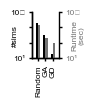

In [22]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.35, 0.6))
    
    _ = ax.bar([0-0.15, 1-0.15, 2-0.15], [random_required, ga_required, gd_required], color="k", width=0.3)
    _ = ax.axhline(1.0)
    _ = ax.set_yscale("log")
    _ = ax.set_xlabel("")
    _ = ax.set_xticks([0, 1, 2])
    _ = ax.set_xticklabels(["Rand", "GA", "GD"], rotation=90)
    _ = ax.set_yticks([10, 100, 1000, 10_000])
    _ = ax.set_ylim([10, 10_000])
    _ = ax.set_yticklabels(["10¹", "", "", "10⁴"])
    _ = ax.set_ylabel("#sims", labelpad=-6)
    _ = ax.set_xlim([-0.8, 2.8])

    col2 = "#737373"
    ax2 = ax.twinx()
    _ = ax2.bar([0+0.15, 1+0.15, 2+0.15], [
        random_required * duration_forward_pass,
        ga_required * duration_forward_pass,
        gd_required * duration_for_gradient, 
    ], color=col2, width=0.3)
    _ = ax2.axhline(1.0)
    _ = ax2.set_yscale("log")
    _ = ax2.set_xlabel("")
    _ = ax2.set_ylabel("Runtime\n(sec)", labelpad=-7, color=col2)
    _ = ax2.set_xticks([0, 1, 2])
    _ = ax2.set_xticklabels(["Random", "GA", "GD"], rotation=90)
    _ = ax2.set_yticks([10, 100, 1000, 10_000])
    _ = ax2.set_ylim([10, 10_000])
    _ = ax2.set_yticklabels(["10¹", "", "", "10⁴"])
    _ = ax2.set_xlim([-0.8, 2.8])
    _ = ax2.tick_params(axis='y', labelcolor=col2)

    ax.spines["right"].set_visible(True)
    plt.savefig("../svg/panel_c2.svg", bbox_inches="tight", transparent=True)
    plt.show()

# Allen data

In [134]:
setup = "473601979"
setups = {
    "485574832": [155, 9],
    "488683425": [195, 0],
    "480353286": [175, 5],
    "473601979": [195, 0],
}
rotation = setups[setup][0]
index = setups[setup][1]

cell = jx.read_swc(f"../../../nex/l5pc/cell_types/specimen_{setup}/reconstruction.swc", nseg=4, assign_groups=True)
cell.rotate(rotation)

with open(f"../results/02_allen/all_best_params_mae_{setup}.pkl", "rb") as handle:
    best_params = pickle.load(handle)
with open(f"../results/02_allen/losses_of_every_starting_point_mae_{setup}.pkl", "rb") as handle:
    all_losses = pickle.load(handle)
with open(f"../results/02_allen/best_traces_mae_{setup}.pkl", "rb") as handle:
    best_traces = pickle.load(handle)

/Users/michaeldeistler/Documents/phd/jaxley/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(


### Panel D3

/Users/michaeldeistler/Documents/phd/jaxley/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(


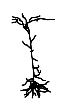

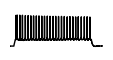

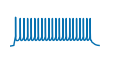

/Users/michaeldeistler/Documents/phd/jaxley/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(


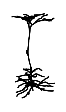

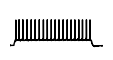

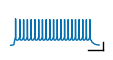

/Users/michaeldeistler/Documents/phd/jaxley/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(


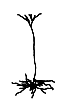

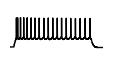

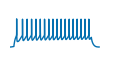

/Users/michaeldeistler/Documents/phd/jaxley/jaxley/utils/swc.py:32: UserWarning: Found a soma which consists of a single traced point. `Jaxley` interprets this soma as a spherical compartment with radius specified in the SWC file, i.e. with surface area 4*pi*r*r.
  warn(


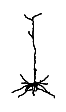

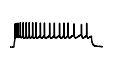

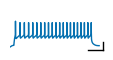

In [139]:
setups = {
    "485574832": [155, 9],
    "488683425": [195, 0],
    "480353286": [175, 5],
    "473601979": [195, 0],
}
for setup in setups.keys():
    rotation = setups[setup][0]
    index = setups[setup][1]
    
    cell = jx.read_swc(f"../../../nex/l5pc/cell_types/specimen_{setup}/reconstruction.swc", nseg=4, assign_groups=True)
    cell.rotate(rotation)
    
    with open(f"../results/02_allen/all_best_params_mae_{setup}.pkl", "rb") as handle:
        best_params = pickle.load(handle)
    with open(f"../results/02_allen/losses_of_every_starting_point_mae_{setup}.pkl", "rb") as handle:
        all_losses = pickle.load(handle)
    with open(f"../results/02_allen/best_traces_mae_{setup}.pkl", "rb") as handle:
        best_traces = pickle.load(handle)
        
    ###################################
    ########### Morphology ############
    ###################################
    with mpl.rc_context(fname="../../../.matplotlibrc"):
        fig, ax = plt.subplots(1, 1, figsize=(0.6, 1.2))
        ax = cell.vis(ax=ax, morph_plot_kwargs={"linewidth": 0.2})
        ax = cell.soma[0,0].vis(ax=ax, col=papercols["soma"], morph_plot_kwargs={"linewidth": 0.2, "s": 15, "zorder": 1000})
        ax = cell.apical.vis(ax=ax, col=papercols["apical"], morph_plot_kwargs={"linewidth": 0.5})
        ax = cell.axon.vis(ax=ax, col=papercols["axon"], morph_plot_kwargs={"linewidth": 0.5})
        ax = cell.basal.vis(ax=ax, col=papercols["basal"], morph_plot_kwargs={"linewidth": 0.5})
        _ = ax.spines["left"].set_visible(False)
        _ = ax.spines["bottom"].set_visible(False)
        _ = ax.set_xticks([])
        _ = ax.set_yticks([])
        plt.savefig(f"../svg/panel_d1_{setup}.svg", bbox_inches="tight", transparent=True)
        plt.show()
    
    
    ###################################
    ####### Experimental trace ########
    ###################################
    dt = 0.025
    time_pad_on = 50.0
    time_pad_off = 150.0
    junction_potential = -14.0
    
    with open(f"../../../nex/l5pc/cell_types/specimen_{setup}/ephys_01.pkl", "rb") as handle:
        ephys = pickle.load(handle)
    
    dt_stim = np.mean(np.diff(ephys["time"]))
    dt_difference = dt / dt_stim / 1000
    
    ephys_stim = ephys["stimulus"][::int(dt_difference)]
    ephys_rec = ephys["response"][::int(dt_difference)] + junction_potential
    ephys_time_vec = ephys["time"][::int(dt_difference)]
    
    stim_onset = np.where(ephys_stim > 0.05)[0][0]
    protocol_start = int(stim_onset - time_pad_on / 0.025)
    
    stim_offset = np.where(ephys_stim < 0.05)[0]
    stim_offset = stim_offset[stim_offset > 20_000][0]
    protocol_end = int(stim_offset + time_pad_off / 0.025)
    
    ephys_stim = ephys_stim[protocol_start:protocol_end]
    ephys_rec = ephys_rec[protocol_start:protocol_end]
    ephys_time_vec = ephys_time_vec[protocol_start:protocol_end] * 1000
    ephys_time_vec -= ephys_time_vec[0]
    
    with mpl.rc_context(fname="../../../.matplotlibrc"):
        fig, ax = plt.subplots(1, 1, figsize=(1.2, 0.53))
        ax.plot(ephys_time_vec, ephys_rec, c=papercols["data"])
        _ = ax.set_xticks([])
        _ = ax.set_xlim([0, 1200])
        _ = ax.set_yticks([])
        _ = ax.set_ylim([-100, 50])
        _ = ax.spines["bottom"].set_visible(False)
        _ = ax.spines["left"].set_visible(False)
        plt.savefig(f"../svg/panel_d2_{setup}.svg", bbox_inches="tight", transparent=True)
        plt.show()
    
    ###################################
    ##### Gradient descent trace ######
    ###################################
    time_vec = np.arange(0, 1150+0.05, 0.025)
    best_traces = np.asarray(best_traces)
    
    with mpl.rc_context(fname="../../../.matplotlibrc"):
        fig, ax = plt.subplots(1, 1, figsize=(1.2, 0.53))
        _ = ax.plot(time_vec, best_traces[index, 0], c=papercols["jaxley"])

        # Scalebar.
        if setup in ["488683425", "473601979"]:
            _ = ax.plot([1200, 1200], [-100.0, -70.0], c="k", clip_on=False)
            _ = ax.plot([1000, 1200], [-100.0, -100.0], c="k", clip_on=False)
        
        _ = ax.set_xticks([])
        _ = ax.set_xlim([0, 1200])
        _ = ax.set_yticks([])
        _ = ax.set_ylim([-100, 50])
        _ = ax.spines["bottom"].set_visible(False)
        _ = ax.spines["left"].set_visible(False)
        plt.savefig(f"../svg/panel_d3_{setup}.svg", bbox_inches="tight", transparent=True)
        plt.show()

# Voltage imaging

In [68]:
with open("../results/03_voltage_imaging/cell.pkl", "rb") as handle:
    cell = pickle.load(handle)

with open("../results/03_voltage_imaging/profile_evals.pkl", "rb") as handle:
    evals = pickle.load(handle)

with open("../results/03_voltage_imaging/axonal_profile.pkl", "rb") as handle:
    gt_profiles_axonal = pickle.load(handle)

with open("../results/03_voltage_imaging/apical_profile.pkl", "rb") as handle:
    gt_profiles_apical = pickle.load(handle)

with open("../results/03_voltage_imaging/recording_xo.pkl", "rb") as handle:
    x_o = pickle.load(handle)

with open("../results/03_voltage_imaging/ga_losses.pkl", "rb") as handle:
    ga_losses = pickle.load(handle)

with open("../results/03_voltage_imaging/gd_losses.pkl", "rb") as handle:
    gd_losses = pickle.load(handle)

with open("../results/03_voltage_imaging/params.pkl", "rb") as handle:
    params = pickle.load(handle)

with open("../results/03_voltage_imaging/bounds.pkl", "rb") as handle:
    bounds = pickle.load(handle)

with open("../results/03_voltage_imaging/prediction.pkl", "rb") as handle:
    prediction = pickle.load(handle)

### Panel E1

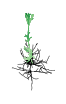

In [56]:
cmap = papercols["parameter_cmap"]
vals = np.asarray(np.repeat(params[0]["apical_NaTs2T_gNaTs2T"], 4) / 0.04)

with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.6, 1.1))
    _ = cell.vis(ax=ax, col="k", morph_plot_kwargs={"linewidth": 0.3, "alpha": 0.3})
    for b in range(129):
        _ = cell.apical.branch(b).vis(
            ax=ax,
            col=cmap(vals[b * 4 + 3]),
            morph_plot_kwargs={"linewidth": 0.3, "zorder": 1000},
        )
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig("../svg/panel_e1.svg", bbox_inches="tight", transparent=True)
    plt.show()

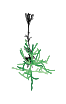

In [57]:
vals = np.asarray(np.repeat(params[-3]["axonal_CaLVA_gCaLVA"], 4) / 0.01)

with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.6, 1.1))
    _ = cell.vis(ax=ax, col="k", morph_plot_kwargs={"linewidth": 0.3, "alpha": 0.3})
    for b in range(int(len(cell.axon.view) / 4)):
        _ = cell.axon.branch(b).vis(
            ax=ax,
            col=cmap(vals[b * 4 + 3]),
            morph_plot_kwargs={"linewidth": 0.3, "zorder": 1000},
        )
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    plt.savefig("../svg/panel_e2.svg", bbox_inches="tight", transparent=True)
    plt.show()

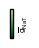

In [58]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    a = np.array([[0,1]])
    plt.figure(figsize=(0.035, 0.48))
    img = plt.imshow(a, cmap=cmap)
    plt.gca().set_visible(False)
    cax = plt.axes([0.1, 0.2, 0.8, 0.6])
    cbar = plt.colorbar(cax=cax, ticks=[])
    name = r"$\overline{g}_{NaT}$"
    cbar.set_label(f"{name}", labelpad=3)
    plt.savefig("../svg/panel_e3.svg", bbox_inches="tight", transparent=True)
    plt.show()

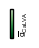

In [59]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    a = np.array([[0,1]])
    plt.figure(figsize=(0.035, 0.48))
    img = plt.imshow(a, cmap=cmap)
    plt.gca().set_visible(False)
    cax = plt.axes([0.1, 0.2, 0.8, 0.6])
    cbar = plt.colorbar(cax=cax, ticks=[])
    name = r"$\overline{g}_{CaLVA}$"
    cbar.set_label(f"{name}", labelpad=3)
    plt.savefig("../svg/panel_e4.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel F1

In [69]:
from nex.colors import cols as papercols

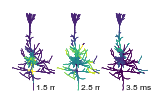

In [71]:
cmap = papercols["data_cmap"]
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 3, figsize=(1.8, 1.1))
    for i in range(3):
        observation_time = x_o[:, 60 + i * 40]
        observation_time += 80.0
        observation_time /= 120.0
        for b in range(len(cell.nodes) // 4):
            _ = cell.branch(b).vis(ax=ax[i], morph_plot_kwargs={"linewidth": 0.3}, col=cmap(observation_time[b]))
        # _ = cell.vis(ax=ax[i], morph_plot_kwargs={"linewidth": 0.3}, col=observation_time, colormap=papercols["data_cmap"])
        _ = ax[i].spines["left"].set_visible(False)
        _ = ax[i].spines["bottom"].set_visible(False)
        _ = ax[i].set_xticks([])
        _ = ax[i].set_yticks([])
    _ = ax[0].text(400, -650, "1.5 ms")
    _ = ax[1].text(400, -650, "2.5 ms")
    _ = ax[2].text(400, -650, "3.5 ms")
    plt.subplots_adjust(wspace=-0.1)
    plt.savefig("../svg/panel_f1.svg", bbox_inches="tight", transparent=True)
    plt.show()

In [72]:
# with mpl.rc_context(fname="../../../.matplotlibrc"):
#     fig, ax = plt.subplots(1, 3, figsize=(1.8, 1.1))
#     for i in range(3):
#         observation_time = x_o[:, 60 + i * 40]
#         observation_time += 80.0
#         observation_time /= 120.0
#         _ = cell.vis(ax=ax[i], morph_plot_kwargs={"linewidth": 0.3}, col=observation_time, colormap=papercols["data_cmap"])
#         _ = ax[i].spines["left"].set_visible(False)
#         _ = ax[i].spines["bottom"].set_visible(False)
#         _ = ax[i].set_xticks([])
#         _ = ax[i].set_yticks([])
#     _ = ax[0].text(400, -650, "1.5 ms")
#     _ = ax[1].text(400, -650, "2.5 ms")
#     _ = ax[2].text(400, -650, "3.5 ms")
#     plt.subplots_adjust(wspace=-0.1)
#     plt.savefig("../svg/panel_f1.svg", bbox_inches="tight", transparent=True)
#     plt.show()

### Panel F2

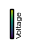

In [73]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    a = np.array([[0,1]])
    plt.figure(figsize=(0.035, 0.48))
    img = plt.imshow(a, cmap=papercols["data_cmap"])
    plt.gca().set_visible(False)
    cax = plt.axes([0.1, 0.2, 0.8, 0.6])
    cbar = plt.colorbar(cax=cax, ticks=[])
    cbar.set_label("Voltage", labelpad=3)
    plt.savefig("../svg/panel_f2.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel G

In [155]:
with open("../results/03_voltage_imaging/processed_posterior_apical.pkl", "rb") as handle:
    processed_posterior = pickle.load(handle)

In [156]:
ind = 0
keys = list(processed_posterior.keys())[:1]
key = keys[ind]

In [157]:
data = processed_posterior[key]["x_axis"]

key axonal_KTst_gKTst


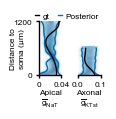

In [169]:
color = papercols["jaxley"]

with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, axs = plt.subplots(1, 2, figsize=(0.8, 0.7))

    for i in range(2):
        if i == 0:
            # First plot
            ind = 0
            evals = np.linspace(0, 1200, 100)
            names = [r"$\overline{g}_{NaT}$"]
            with open("../results/03_voltage_imaging/processed_posterior_apical.pkl", "rb") as handle:
                processed_posterior = pickle.load(handle)
            keys = list(processed_posterior.keys())[:1]
            key = keys[ind]
            bounds = processed_posterior["bounds"]
            gt_profiles_apical = processed_posterior["gt_profiles_apical"]
                    
            data = processed_posterior[key]
            xaxis = data["x_axis"]
            yaxis = data["y_axis"]
            q = data["quantiles"]
            idx_005 = data["idx_005"]
            idx_095 = data["idx_095"]

            axs[0].set_ylabel("Distance to\nsoma " + r"($\mu$m)", labelpad=-10)
            axs[1].spines['left'].set_visible(False)
            axs[1].yaxis.set_visible(False)
        
            axs[0].plot(gt_profiles_apical[key] * bounds[key][1],evals, color='black', lw=1, zorder=1000)
            axs[0].plot(q[idx_005],xaxis,  color=color, lw=1, linestyle='-')
            axs[0].plot(q[idx_095],xaxis,  color=color, lw=1, linestyle='-')
            
            axs[0].set_xlabel(f"Apical\n{names[ind]}", labelpad=1)
        else:
            # Second plot
            evals = np.linspace(0, 1200, 100)
            names = [r"$\overline{g}_{KTst}$"]
            with open("../results/03_voltage_imaging/processed_posterior_axonal.pkl", "rb") as handle:
                processed_posterior = pickle.load(handle)
            keys = list(processed_posterior.keys())[:8]
            ind = 2  ########################################################################################## TODO
            key = keys[ind]
            bounds = processed_posterior["bounds"]
            gt_profiles_axonal = processed_posterior["gt_profiles_axonal"]

            print("key", key)
            data = processed_posterior[key]
            xaxis = data["x_axis"]
            yaxis = data["y_axis"]
            q = data["quantiles"]
            idx_005 = data["idx_005"]
            idx_095 = data["idx_095"]
        
            axs[1].plot(gt_profiles_axonal[key][:len(evals)//2] * bounds[key][1], evals[:len(evals)//2], color='black', lw=1, zorder=1000)
            axs[1].plot(q[idx_005], xaxis, color=color, lw=1, linestyle='-')
            axs[1].plot(q[idx_095], xaxis, color=color, lw=1, linestyle='-')

            axs[1].set_xlabel(f"Axonal\n{names[0]}", labelpad=1)

        for j in range(100):
            color_index = (1- jnp.abs(i - 50)/50)**0.1
            axs[i].plot(q[j],xaxis, color=color, alpha=0.02, lw=3)
        
        axs[i].set_xlim(bounds[key])
        axs[i].set_xticks(bounds[key])
        axs[i].set_xticklabels([b for b in bounds[key]])
        axs[i].set_ylim([0,1200])
        axs[i].set_yticks([0,1200])

    axs[0].set_ylabel("Distance to\nsoma " + r"($\mu$m)", labelpad=-10)
    axs[1].spines['left'].set_visible(False)
    axs[1].yaxis.set_visible(False)

    _ = axs[1].legend(
        ["gt", "Posterior"],
        loc="upper right",
        bbox_to_anchor=[1.25, 1.3, 0.0, 0.0],
        ncols=2,
        handlelength=0.5,
        columnspacing=1.0,
        handletextpad=0.4,
    )
    plt.subplots_adjust(wspace=0.7)
    fig.savefig("../svg/panel_g.svg", bbox_inches="tight", transparent=True)
    
    plt.show()

### Panel H

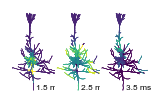

In [74]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 3, figsize=(1.8, 1.1))
    for i in range(3):
        observation_time = prediction[:, 60 + i * 40]
        observation_time += 80.0
        observation_time /= 120.0
        for b in range(len(cell.nodes) // 4):
            _ = cell.branch(b).vis(ax=ax[i], morph_plot_kwargs={"linewidth": 0.3}, col=cmap(observation_time[b * 4]))
        _ = ax[i].spines["left"].set_visible(False)
        _ = ax[i].spines["bottom"].set_visible(False)
        _ = ax[i].set_xticks([])
        _ = ax[i].set_yticks([])
    _ = ax[0].text(400, -650, "1.5 ms")
    _ = ax[1].text(400, -650, "2.5 ms")
    _ = ax[2].text(400, -650, "3.5 ms")
    plt.subplots_adjust(wspace=-0.1)
    plt.savefig("../svg/panel_h.svg", bbox_inches="tight", transparent=True)
    plt.show()

### Panel I

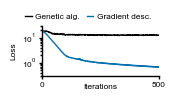

In [52]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.5, 0.65))
    _ = ax.plot(ga_losses, color=papercols["genetic_alg"])
    _ = ax.plot(gd_losses, color=papercols["jaxley"])
    _ = ax.set_yscale("log")
    _ = ax.set_ylim([0.3, 30])
    _ = ax.set_ylabel("Loss")
    _ = ax.set_xlabel("Iterations", labelpad=-3)
    _ = ax.set_xlim([0, 500])
    _ = ax.legend(
        ["Genetic alg.", "Gradient desc."], 
        loc="upper right", 
        bbox_to_anchor=[1.0, 1.4, 0.0, 0.0], 
        ncol=2, 
        handlelength=0.8,
        columnspacing=0.8,
        handletextpad=0.4,
    )
    _ = ax.set_xticks([0, 500])
    plt.savefig("../svg/panel_i.svg", bbox_inches="tight")
    plt.show()

# Nonlinear single neuron

In [4]:
from nex.colors import cols as papercols

In [21]:
with open("../results/04_nonlinear/gd_loss.pkl", "rb") as handle:
    all_gd_losses = pickle.load(handle)

with open("../results/04_nonlinear/ga_loss.pkl", "rb") as handle:
    all_ga_losses = pickle.load(handle)

with open("../results/04_nonlinear/gd_prediction_surface.pkl", "rb") as handle:
    prediction_grid = pickle.load(handle)

with open("../results/04_nonlinear/traces.pkl", "rb") as handle:
    traces = pickle.load(handle)

with open("../results/04_nonlinear/labels.pkl", "rb") as handle:
    labels = pickle.load(handle)

with open("../results/04_nonlinear/time_vec.pkl", "rb") as handle:
    time_vec = pickle.load(handle)

with open("../results/04_nonlinear/train_images.pkl", "rb") as handle:
    train_images = pickle.load(handle)

with open("../results/04_nonlinear/train_labels.pkl", "rb") as handle:
    train_labels = pickle.load(handle)

### Panel J1

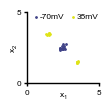

In [22]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.92, 0.92))
    for p, l in zip(train_images[:100], train_labels[:100]):
        _ = ax.scatter(p[0], p[1], c=papercols["data_classes"][1] if l else papercols["data_classes"][0], s=1.0)
    _ = ax.set_xlim([0, 5])
    _ = ax.set_ylim([0, 5])
    _ = ax.set_xticks([0, 5])
    _ = ax.set_yticks([0, 5])
    _ = ax.set_xlabel(r"$x_1$", labelpad=-3)
    _ = ax.set_ylabel(r"$x_2$", labelpad=-3)
    _ = ax.legend(["-70mV", "35mV"], loc="upper right", bbox_to_anchor=[1.1, 1.1, 0.0, 0.0],
                  ncols=2, columnspacing=0.1, handletextpad=-0.6)
    plt.savefig("../svg/panel_j1.svg", bbox_inches="tight")
    plt.show()

### Panel J2

In [23]:
depth = 2
nseg_per_branch = 4

parents = [-1] + [b // 2 for b in range(0, 2**depth - 2)]
parents = jnp.asarray(parents)

num_branches = len(parents)

comp = jx.Compartment().initialize()
branch = jx.Branch([comp for _ in range(nseg_per_branch)]).initialize()
cell = jx.Cell([branch for _ in range(num_branches)], parents=parents).initialize()

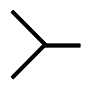

In [24]:
cell.compute_xyz()
cell.rotate(180)

with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.92, 0.92))
    ax = cell.vis(ax=ax, morph_plot_kwargs={"linewidth": 2.5})
    _ = ax.spines["left"].set_visible(False)
    _ = ax.spines["bottom"].set_visible(False)
    _ = ax.set_xticks([])
    _ = ax.set_yticks([])
    # plt.savefig("results/figs/fig1/svg/simple_morph.svg", dpi=200, bbox_inches="tight")
    plt.savefig("../svg/panel_j2.svg", bbox_inches="tight")
    plt.show()

### Panel K

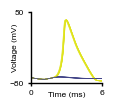

In [25]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(0.92, 0.92))
    for i, trace in enumerate(traces):
        col = papercols["jaxley_classes"][1] if labels[i] != -70.0 else papercols["jaxley_classes"][0]
        _ = ax.plot(time_vec, trace[0], c=col, linewidth=0.4, alpha=1.0)
        _ = ax.set_ylim([-80, 50])
        _ = ax.set_yticks([-80, 50])
        _ = ax.set_xticks([0, 6])
        _ = ax.set_xlim([0, 6])
        _ = ax.set_xlabel("Time (ms)", labelpad=-3)
        _ = ax.set_ylabel("Voltage (mV)", labelpad=-6)
    plt.savefig("../svg/panel_k.svg", bbox_inches="tight")
    plt.show()

### Panel L

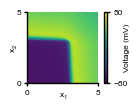

In [26]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.4, 0.92))
    p = ax.imshow(
        prediction_grid,
        origin="lower",
        extent=[0, 5, 0, 5],
        vmin=-80.0,
        vmax=50.0,
        cmap=papercols["jaxley_cmap"],
    )
    _ = ax.set_xticks([0, 5])
    _ = ax.set_yticks([0, 5])
    _ = ax.set_xlabel(r"$x_1$", labelpad=-3)
    _ = ax.set_ylabel(r"$x_2$", labelpad=-3)
    cb = plt.colorbar(p, ticks=[-80, 50])
    cb.set_label("Voltage (mV)", labelpad=-3)
    plt.savefig("../svg/panel_l.svg", bbox_inches="tight")
    plt.show()

### Panel M

In [27]:
all_gd_losses = np.asarray(all_gd_losses)
all_ga_losses = np.asarray(all_ga_losses)

# best_gd = np.unravel_index(np.argmin(all_gd_losses), (10, 200))[0]
# best_ga = np.unravel_index(np.argmin(all_ga_losses), (10, 200))[0]
# best_gd = 2
# average_loss_gd = all_gd_losses[best_gd]
# average_loss_ga = all_ga_losses[best_ga]

average_loss_gd = np.min(all_gd_losses, axis=0)
average_loss_ga = np.min(all_ga_losses, axis=0)

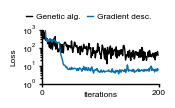

In [29]:
with mpl.rc_context(fname="../../../.matplotlibrc"):
    fig, ax = plt.subplots(1, 1, figsize=(1.5, 0.7))
    _ = ax.plot(average_loss_ga, color=papercols["genetic_alg"])
    _ = ax.plot(average_loss_gd, color=papercols["jaxley"])
    _ = ax.set_ylabel("Loss")
    _ = ax.set_xlabel("Iterations", labelpad=-3)
    _ = ax.set_yscale("log")
    _ = ax.legend(
        ["Genetic alg.", "Gradient desc."], 
        loc="upper right", 
        bbox_to_anchor=[1.0, 1.45, 0.0, 0.0], 
        ncol=2, 
        handlelength=0.8,
        columnspacing=0.8,
        handletextpad=0.4,
    )
    _ = ax.set_ylim([1.0, 1000])
    _ = ax.set_xticks([0, 200])
    _ = ax.set_xlim([0, 200])
    plt.savefig("../svg/panel_m.svg", bbox_inches="tight")
    plt.show()

# Assemble

In [170]:
def svg(img):
    IPd.display(IPd.HTML('<img src="{}" / >'.format(img, time.time())))

svg_scale = 1.334  # set this to 1.334 for Inkscape, 1.0 otherwise

# Panel letters in Helvetica Neue, 12pt, Medium
kwargs_text = {'size': '8pt', 'font': 'Arial', 'weight': '800'}
kwargs_text_normal = {'size': '6pt', 'font': 'Arial'}

heading11 = Text("Task 1:", 0, 0.0, **kwargs_text_normal)
heading21 = Text("Task 2:", 0, 0.0, **kwargs_text_normal)
heading31 = Text("Task 3:", 0, 0.0, **kwargs_text_normal)
heading11.rotate(270)
heading21.rotate(270)
heading31.rotate(270)

heading12 = Text("Task 1: Intracell. recording", 0, 0.0, **kwargs_text_normal)
heading22 = Text("Task 2: Whole cell rec.", 0, 0.0, **kwargs_text_normal)
heading32 = Text("Task 3: Nonlinear comp.", 0, 0.0, **kwargs_text_normal)
heading12.rotate(270)
heading22.rotate(270)
heading32.rotate(270)

f = Figure(
    "18.0cm",
    "9.3cm",
    
    Panel(
        SVG("../svg/panel_a1.svg").scale(svg_scale).move(10, 0),
        Text("a", 13, 2.0, **kwargs_text),
        Text("Morphology", 21, 2.0, **kwargs_text_normal),
    ).move(15, 8),
    # Panel(SVG("../svg/panel_a2.svg").scale(svg_scale)).move(16, 4),

    Panel(
        SVG("../svg/panel_b1.svg").scale(svg_scale).move(0, -1.0),
        Text("b", 5, 2.0, **kwargs_text), Text("Synthetic data", 28, 2.0, **kwargs_text_normal)
    ).move(85, 8),
    Text("Gradient descent fit", 15, 2.0, **kwargs_text_normal).move(90, 70),
    Panel(SVG("../svg/panel_b2.svg").scale(svg_scale)).move(85, 57),

    Panel(
        SVG("../svg/panel_c1.svg").scale(svg_scale).move(0, -5.8),
        Text("c", 6, 2.0, **kwargs_text),
        Text("Training speed", 50, 2.0, **kwargs_text_normal)
    ).move(195, 8),
    Panel(SVG("../svg/panel_c2.svg").scale(svg_scale)).move(274, 26.5),

    Panel(SVG("../svg/panel_d1_485574832.svg").scale(svg_scale), Text("d", 0, 2.0, **kwargs_text), Text("Identifying models that match patch-clamp recordings", 57, 2.0, **kwargs_text_normal)).move(370, 8),
    Panel(SVG("../svg/panel_d1_488683425.svg").scale(svg_scale)).move(535, 8),
    Panel(SVG("../svg/panel_d2_485574832.svg").scale(svg_scale)).move(415, 10),
    Panel(SVG("../svg/panel_d2_488683425.svg").scale(svg_scale)).move(580, 10),
    Panel(SVG("../svg/panel_d3_485574832.svg").scale(svg_scale)).move(415, 55.5),
    Panel(SVG("../svg/panel_d3_488683425.svg").scale(svg_scale)).move(580, 55.5),

    Panel(SVG("../svg/panel_e1.svg").scale(svg_scale), Text("e", 3, 2.0, **kwargs_text), Text("Conductance profiles", 15, 2.0, **kwargs_text_normal)).move(25, 135),
    Panel(SVG("../svg/panel_e2.svg").scale(svg_scale)).move(65, 135),
    Panel(SVG("../svg/panel_e3.svg").scale(svg_scale)).move(55, 135),
    Panel(SVG("../svg/panel_e4.svg").scale(svg_scale)).move(95, 135),
    Panel(SVG("../svg/panel_f1.svg").scale(svg_scale), Text("f", 20, 2.0, **kwargs_text), Text("Synthetic data", 50, 2.0, **kwargs_text_normal)).move(120, 135),
    Panel(SVG("../svg/panel_f2.svg").scale(svg_scale)).move(237, 133),
    Panel(SVG("../svg/panel_g.svg").scale(svg_scale), Text("h", 5, 2.0, **kwargs_text), Text("Recovered profiles", 20, 2.0, **kwargs_text_normal)).move(415, 135),
    Panel(SVG("../svg/panel_h.svg").scale(svg_scale), Text("g", 15, 2.0, **kwargs_text), Text("Predicted voltage", 45, 2.0, **kwargs_text_normal)).move(260, 135),
    Panel(SVG("../svg/panel_f2.svg").scale(svg_scale)).move(377, 133),
    Panel(SVG("../svg/panel_i.svg").scale(svg_scale), Text("i", 10, 2.0, **kwargs_text), Text("Training speed", 55, 2.0, **kwargs_text_normal)).move(519, 135),

    Panel(SVG("../svg/panel_j1.svg").scale(svg_scale), Text("j", 3, 2.0, **kwargs_text), Text("Task: Nonlinear pattern separation", 55, 2.0, **kwargs_text_normal)).move(25, 250),
    Panel(SVG("../svg/panel_j2_processed.svg").scale(svg_scale)).move(130, 255),
    Panel(SVG("../svg/panel_k.svg").scale(svg_scale), Text("k", 0, 2.0, **kwargs_text), Text("Learned traces", 35, 2.0, **kwargs_text_normal)).move(270, 250),
    Panel(SVG("../svg/panel_l.svg").scale(svg_scale), Text("l", 2, 2.0, **kwargs_text), Text("Decision surface", 30, 2.0, **kwargs_text_normal)).move(385, 250),
    Panel(SVG("../svg/panel_m.svg").scale(svg_scale), Text("m", 10, 2.0, **kwargs_text), Text("Training speed", 55, 2.0, **kwargs_text_normal)).move(519, 250),

    Panel(SVG("../svg/titles_short.svg").scale(1.0)).move(0, 6),
)

!mkdir -p fig
f.save("../fig/fig3.svg")
svg("../fig/fig3.svg")

/Users/michaeldeistler/anaconda3/envs/nex/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
